In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

Reading input dataset

In [4]:
loan_df = pd.read_csv(r"C:\Users\Anjali Verma\OneDrive\Desktop\Micky\lending_club_case_study\loan\loan.csv")
# column_rename_mapping = pd.read_csv(r"C:\Users\Anjali Verma\OneDrive\Desktop\Micky\lending_club_case_study\loan\column_rename_mapping.csv")

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Checking basic details about data like no of records, no of missing values, datatypes

In [6]:
# No of columns and rows in dataset
loan_df.shape

# Output: 39,717 total rows and 111 total columns

(39717, 111)

In [7]:
# info
loan_df.info(verbose=True, show_counts=True)

# Output: Emp length, emp title, loan description, mths_since_last_delinq,mths_since_last_record, revol_util , last_pymnt_d , next_pymnt_d (1140)                    
# , collections_12_mths_ex_med has few null entries, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens

# And there are some columns for which all rows has empty entries i.e. no information available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [8]:
# Finding unique records
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

Since we have to find out the factors that drives defaulters and non-defaulter, so considering only those cases where loan_status is **Fully Paid** and **Charged Off**.

In [9]:
loan_filtered_df = loan_df[loan_df["loan_status"].isin(["Fully Paid", "Charged Off"])]

-  Data cleaning checks done:
    -  No header or footer row exist
    -  No summary rows exist i.e. one capturing total or sub-total
    -  No rows exist with all empty values
    -  No column names missing
    -  Column renaming done to have better understanding of data
    -  Deleted column as specified in cell 89
    -  Column splitting done for columns ---
    -  No misaligned columns found

In [10]:
# Renaming columns
# dict_column_rename_mapping = dict(zip(column_rename_mapping["original_columns"], column_rename_mapping["new_columns"]))

# dict_column_rename_mapping

# # Final column names
# loan_df.rename(columns=dict_column_rename_mapping,
#           inplace=True)

In [11]:
# Column splitting/merging--date columns

In [12]:
# Checking % of records that are empty
(loan_filtered_df.isnull().sum()/loan_filtered_df.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

**Assumption:** Since, customer behaviour columns are not available at the time of loan application so excluding those column from analysis.
-  delinq_2yrs
-  earliest_cr_line
-  inq_last_6mths
-  open_acc
-  pub_rec
-  revol_bal
-  revol_util
-  total_acc
-  out_prncp
-  out_prncp_inv
-  total_pymnt
-  total_pymnt_inv
-  total_rec_prncp
-  total_rec_int
-  total_rec_late_fee
-  recoveries
-  collection_recovery_fee
-  last_pymnt_d
-  last_pymnt_amnt
-  last_credit_pull_d
-  application_type

**Removing columns that has all records as blank** 

**and removing records which has 0 or nan values:**
-  delinq_amnt
-  collections_12_mths_ex_med
-  acc_now_delinq
-  delinq_amnt
-  chargeoff_within_12_mths
-  tax_liens

In [13]:
# Removing columns that has all records filled with NaN values i.e. no information found
column_list = ["mths_since_last_major_derog", "annual_inc_joint", "dti_joint", "verification_status_joint", "tot_coll_amt",
              "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il",
              "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi",
              "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "mo_sin_old_il_acct",
              "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc", "mths_since_recent_bc", "mths_since_recent_bc_dlq",
              "mths_since_recent_inq", "mths_since_recent_revol_delinq", "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats",
              "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "num_sats", "num_tl_120dpd_2m",
              "num_tl_30dpd", "num_tl_90g_dpd_24m", "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "tot_hi_cred_lim", "total_bal_ex_mort",
              "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp",
                "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
                "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type", "delinq_amnt", "collections_12_mths_ex_med", "acc_now_delinq", "delinq_amnt", "chargeoff_within_12_mths", "tax_liens"]
loan_filtered_df = loan_filtered_df.drop(column_list, axis=1)

In [14]:
# Checking shape
loan_filtered_df.shape

(38577, 31)

In [15]:
# Finding unique records
loan_filtered_df.nunique()

id                        38577
member_id                 38577
loan_amnt                   870
funded_amnt                1019
funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_title                 28027
emp_length                   11
home_ownership                5
annual_inc                 5215
verification_status           3
issue_d                      55
loan_status                   2
pymnt_plan                    1
url                       38577
desc                      25803
purpose                      14
title                     19297
zip_code                    822
addr_state                   50
dti                        2853
mths_since_last_delinq       95
mths_since_last_record      111
initial_list_status           1
next_pymnt_d                  0
policy_code                   1
pub_rec_bankruptcies          3
dtype: i

Treating invalid data within columns

In [16]:
# Changing data type of id and member id columns to string
loan_filtered_df["id"] = loan_filtered_df["id"].apply(lambda x: str(x))
loan_filtered_df["member_id"] = loan_filtered_df["member_id"].apply(lambda x: str(x))
loan_filtered_df["policy_code"] = loan_filtered_df["policy_code"].apply(lambda x: str(x))

In [17]:
# Remove leading blanks
loan_filtered_df["term"] = loan_filtered_df["term"].apply(lambda x: x.strip() if isinstance(x, str) else x)


unique_values = loan_filtered_df["term"].unique()
unique_values


array(['36 months', '60 months'], dtype=object)

In [18]:
# round to two decimal places
pd.set_option("display.max_rows", None)

loan_filtered_df['funded_amnt_inv'] = loan_filtered_df['funded_amnt_inv'].round(decimals = 2)
loan_filtered_df['funded_amnt_inv'].head()


0     4975.0
1     2500.0
2     2400.0
3    10000.0
5     5000.0
Name: funded_amnt_inv, dtype: float64

In [82]:
# round to two decimal places
pd.set_option("display.max_rows", None)

loan_filtered_df['annual_inc'] = loan_filtered_df['annual_inc'].round(decimals = 0)
loan_filtered_df['annual_inc'] = loan_filtered_df['annual_inc'].astype(int)
loan_filtered_df['annual_inc'].head()


0    24000
1    30000
2    12252
3    49200
5    36000
Name: annual_inc, dtype: int32

In [19]:
# treat rows that has integer values. eg: 15, 1400, 36000, 553742017....remove leading and trailing spaces
loan_filtered_df["emp_title"] = np.where(((loan_filtered_df["emp_title"] == "15") | (loan_filtered_df["emp_title"] == "1400")|(loan_filtered_df["emp_title"] == "36000")|(loan_filtered_df["emp_title"] == "553742017")), None, loan_filtered_df["emp_title"])
loan_filtered_df["emp_title"] = loan_filtered_df["emp_title"].apply(lambda x: x.strip() if isinstance(x, str) else x)

loan_filtered_df["emp_title"].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [20]:
# replace NONE with blank
loan_filtered_df["home_ownership"] = np.where(loan_filtered_df["home_ownership"]=="NONE"
                                                        , np.nan, loan_filtered_df["home_ownership"])

loan_filtered_df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', nan], dtype=object)

In [21]:
# remove % and change datatype to float
loan_filtered_df["title"] = loan_filtered_df["title"].str.replace("$","")


print(loan_filtered_df["title"].dtype)
loan_filtered_df["title"].unique()

object


array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [23]:
# remove % and change datatype to float
loan_filtered_df["int_rate"] = loan_filtered_df["int_rate"].str.replace("%","")
loan_filtered_df['int_rate'] = loan_filtered_df['int_rate'].astype(float)


print(loan_filtered_df["int_rate"].dtype)
loan_filtered_df["int_rate"].unique()

float64


array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88, 20.11,
       16.02, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37,
       16.4 , 17.51,  7.66, 18.62, 10.74,  5.79,  6.92, 10.  ,  9.63,
       14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74,
       20.48,  6.91,

**Understanding data: Taking count of records for categorical variables**

In [24]:
# Counting records for unique values of categorical columns
pd.set_option("display.max_rows", None)
str_col_list = ["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "pymnt_plan","addr_state"]
col_list = []
for col in str_col_list:
    if loan_filtered_df[col].dtypes == "object":
        print(loan_filtered_df[col].value_counts())


B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car               

**Checking duplicates in data**

In [25]:
# No duplicate rows found
duplicate = loan_filtered_df[loan_filtered_df.duplicated()]
duplicate

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,policy_code,pub_rec_bankruptcies


**Processing loan date column**

In [26]:
loan_filtered_df[['issue_d_month','issue_d_year']] = loan_filtered_df['issue_d'].str.split('-',expand=True)

**Creating new column to capture annual income bin**

In [ ]:
loan_filtered_df['annual_inc_bin'] = pd.qcut(loan_filtered_df['annual_inc'], 6)

**Treating missing Categorical variables: **
-  **Instruction given in class:** No imputation is to be done, hence not filling blank values with mode.
-  **Recommendation:** Blank values for categorical columns should be replaced by Mode as % of blanks are very less.

In [27]:
# cat_variable_list = ["emp_title", "emp_length"]
# for col in cat_variable_list:
#     value_to_be_filled = loan_df[col].mode()
#     loan_df[col] = loan_df[col].fillna(value_to_be_filled[0])

Treating numerical variable

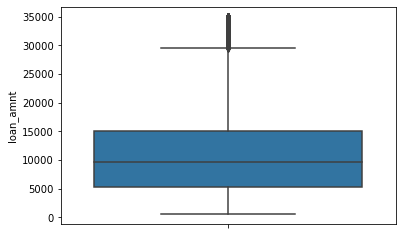

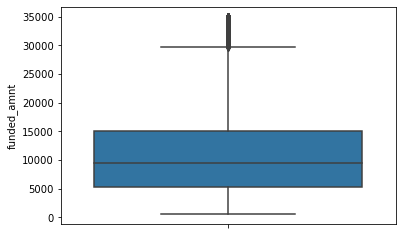

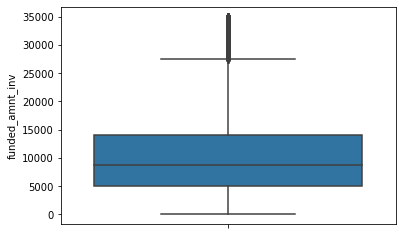

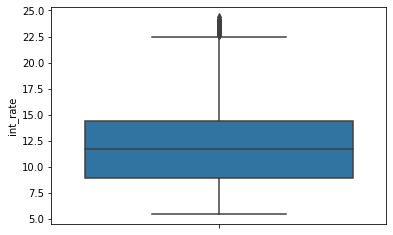

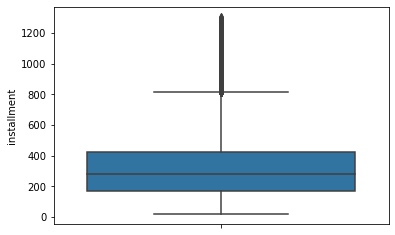

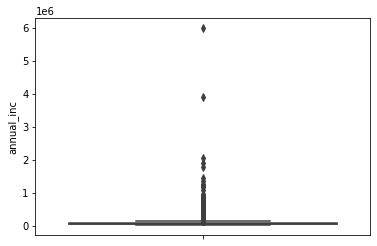

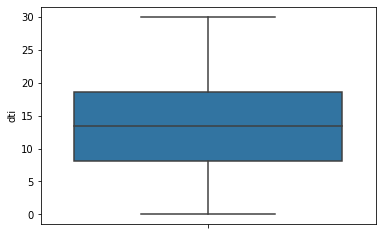

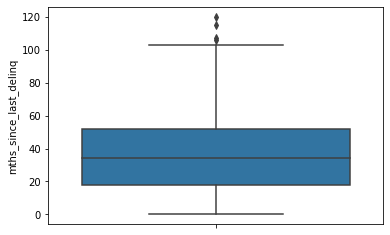

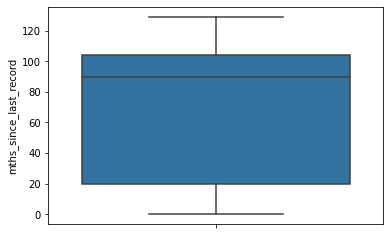

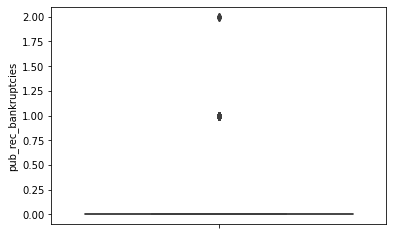

In [28]:
# Find out outliers for filling column set as defined above in marked down cell
col_num_list = loan_filtered_df.select_dtypes(include=["int64", "float64"]).columns
for col in col_num_list:
    plt.figure()
    sns.boxplot(y=loan_filtered_df[col])

**Recommendation:** As per boxplot, columns such as **dti, mths_since_last_record, revol_util,delinq_amnt, chargeoff_within_12_mths, acc_now_delinq,policy_code, collections_12_mths_ex_med, tax_liens** dont have any outliers so for these column will be replacing blanks with **mean** and for other columns blanks should be replaced with **median**.

**In addition to this, if after replacing with mean and median if distribution of data gets distorted or gets changed with original distribution then should replace blanks with closer filled values [using ffil of bfill]**

Creating columns for month and date columns

In [29]:
# import calendar
# # date columns: month_loan_funded,last_month_payment_received, month_earliest_cr_line_reported, recent_month_lc_pulled_credit
# date_cols = ["issue_d", "earliest_cr_line", "last_credit_pull_d"]
# for col in date_cols:
#     loan_filtered_df[col] = "01-" + loan_filtered_df[col]
#     loan_filtered_df[col] = pd.to_datetime(loan_filtered_df[col], utc=False)
#     loan_filtered_df[col + "_month"] = (loan_filtered_df[col].dt.month)

**Checking basic statistics of data**

In [85]:
# Finding basic stats on data
pd.set_option("display.max_columns", None)
loan_filtered_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies,grade_num,term_num,issue_d_month_num,issue_d_year_num
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,37880.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481134,11.932219,322.466318,6.877797e+04,13.272727,35.882534,69.260949,0.043479,2.553361,1.245768,7.114757,4.309070
std,7348.441646,7090.306027,7022.720648,3.691327,208.639215,6.421868e+04,6.673044,22.028093,43.987761,0.204583,1.380003,0.430547,3.408523,0.882658
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,18.000000,19.750000,0.000000,1.000000,1.000000,4.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,34.000000,90.000000,0.000000,2.000000,1.000000,7.000000,5.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.000000,3.000000,1.000000,10.000000,5.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,2.000000,7.000000,2.000000,12.000000,5.000000


**Univariate analysis**

1. countplot for all categorical variable

-------------Loan term period-------------


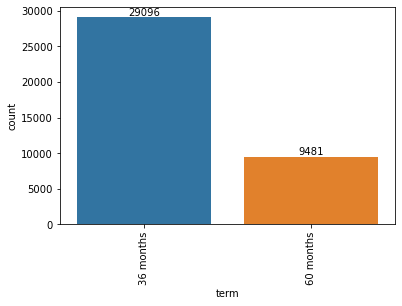

In [31]:
plt.figure()
chart = sns.countplot(loan_filtered_df["term"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Most of the people opted for 36months of loan so that they don't have to pay more interest rate and it would be easier to pay who are well off.
People who are not so well off if opted for less term duration are more likely to default. As the instalment amount would be more and risk of them not paying would be more.

**Expectation:** People who are not well off or capable to pay should opt for larger term period so that they can pay the amount

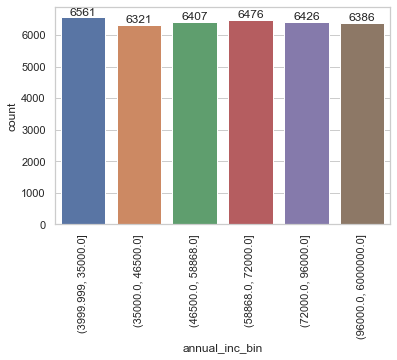

In [87]:
plt.figure()
chart = sns.countplot(loan_filtered_df["annual_inc_bin"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

-------------Grade countplot-------------

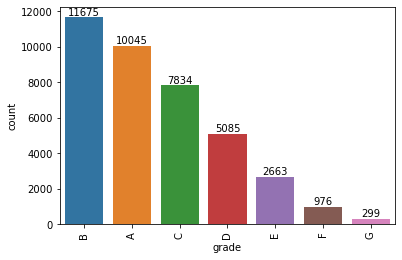

In [32]:
plt.figure()
chart = sns.countplot(loan_filtered_df["grade"], order = loan_filtered_df['grade'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Number of customers who are grade B customers requested for loan than grade A customers.

**Expectation:** More loans should be given out to people considering their grade i.e. as per their likelihood to pay more.

-------------Sub-Grade countplot-------------

<Figure size 432x288 with 0 Axes>

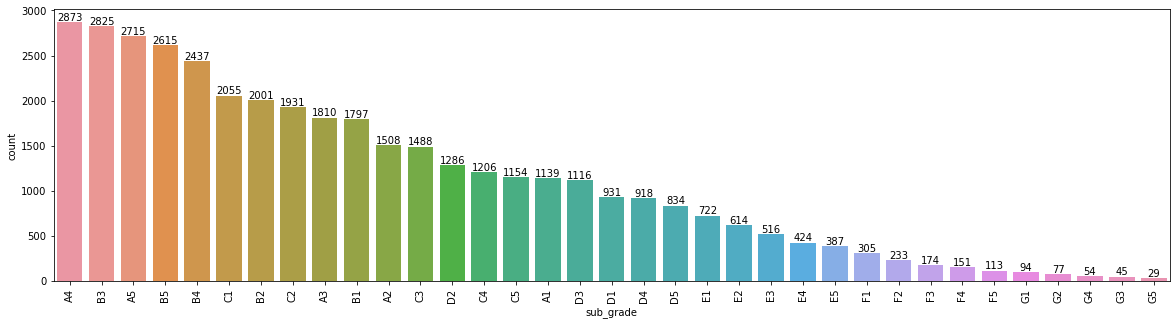

In [33]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.countplot(loan_filtered_df["sub_grade"], order = loan_filtered_df['sub_grade'].value_counts().index, ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Chart clearly depicts large number of cases where loans were given out to majorly B & C grade customers and B3,B5,C1,C2 among top sub_grade records

**Recommendation:**More loans should be given out to people considering their grade & sub_grade i.e. as per their likelihood to pay more

-------------Employment sector of customers---------------

<Figure size 432x288 with 0 Axes>

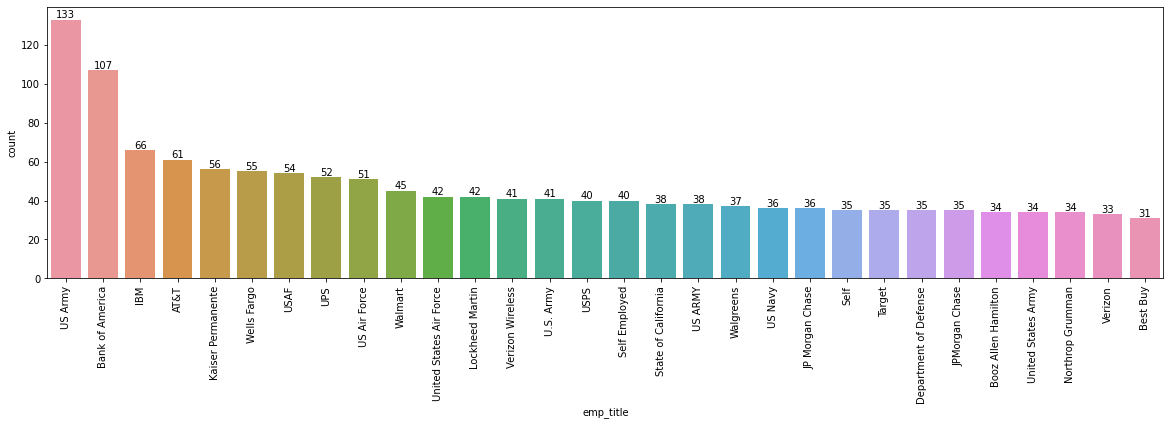

In [34]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.countplot(loan_filtered_df["emp_title"], order=loan_filtered_df.emp_title.value_counts().iloc[:30].index, ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Loans are mostly given out to people working in government sector, IT sector, Helathcare and financial firms

-------------------------Employment length------------------------------

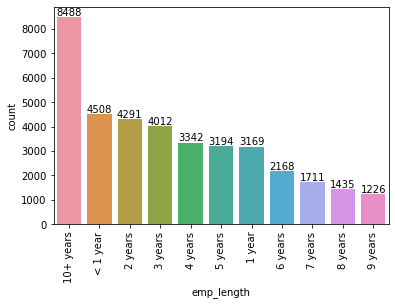

In [35]:
plt.figure()
chart = sns.countplot(loan_filtered_df["emp_length"], order = loan_filtered_df['emp_length'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Most of the customers who requested for loan are the one that either has larger employment length of>10years or least emp length <1year, 2years and so on.

---------------Home ownership------------------

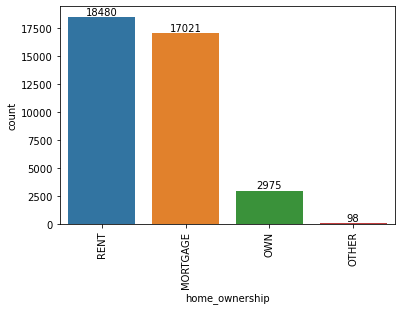

In [36]:
plt.figure()
chart = sns.countplot(loan_filtered_df["home_ownership"], order = loan_filtered_df['home_ownership'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Most of the customers who requested for loan are the one that are either living on rented apartments or on mortgage.
Less likely to repay loan.

**Expectation:** Home ownership status should have been considered while giving out loans

-------------Source of income verification---------------

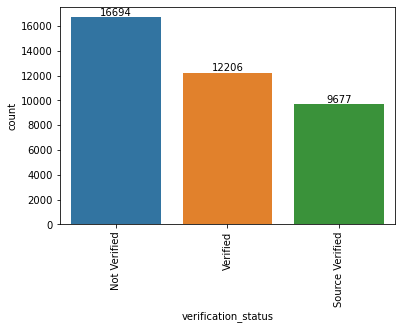

In [37]:
plt.figure()
chart = sns.countplot(loan_filtered_df["verification_status"], order = loan_filtered_df['verification_status'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpreation:** Most of the people who requested for loan are the ones whose source of income was not verified or even if it was verified it was not verified from the source. This means chance of forge verification might occur.

------------Loan status------------

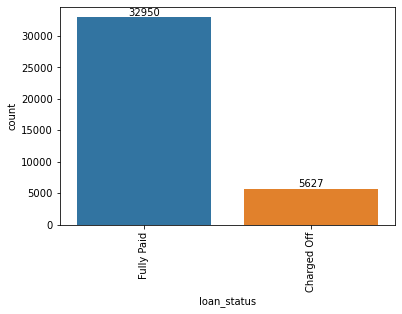

In [38]:
plt.figure()
chart = sns.countplot(loan_filtered_df["loan_status"], order = loan_filtered_df['loan_status'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:** Most of the customers who requested for loan actually paid off as well.
Cases of defaulters are less as compared to fully paid customers.

----------Purpose of taking Loan-------------

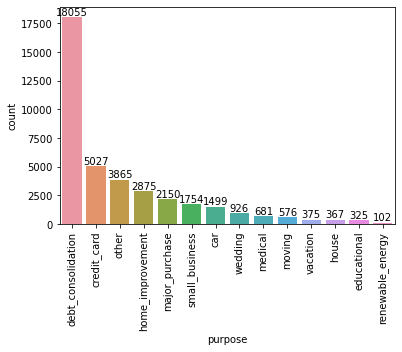

In [39]:
plt.figure()
chart = sns.countplot(loan_filtered_df["purpose"], order = loan_filtered_df['purpose'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpreation:** Main purpose of taking loan for customers were to pay off their existing debts followed by credit card bill payment

--------------------Address of customers---------------------

<Figure size 432x288 with 0 Axes>

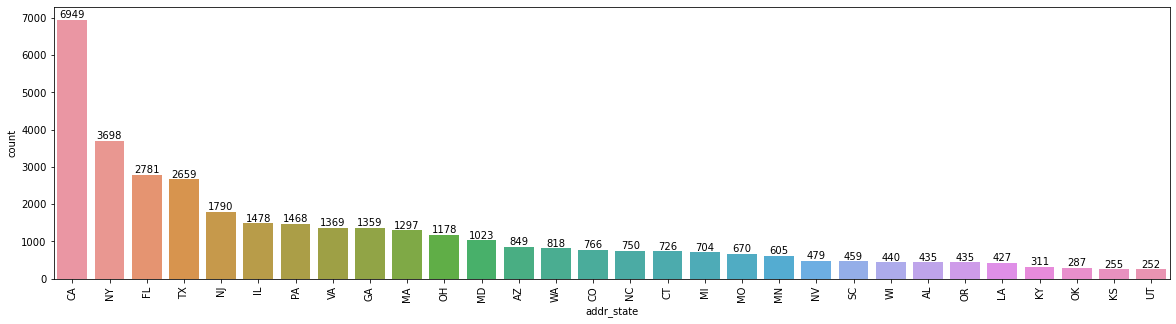

In [40]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.countplot(loan_filtered_df["addr_state"], order=loan_filtered_df["addr_state"].value_counts().iloc[:30].index, ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretations:** Most of the borrowers belong to California, new york, florida, texas, new jersey state

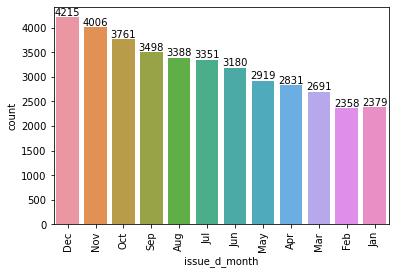

In [41]:
plt.figure()
chart = sns.countplot(loan_filtered_df["issue_d_month"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:**
Year end months such as December, November, October.... has more records
Most of the customers who requested for loan in the month of December, November as these are the festive season in USA (Christmas, New Year and thanksgiving time)

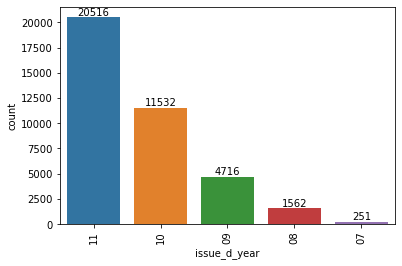

In [42]:
plt.figure()
chart = sns.countplot(loan_filtered_df["issue_d_year"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
plt.show()

**Interpretation:**
2011 and 2010 has more records

Distplot for all numerical variable

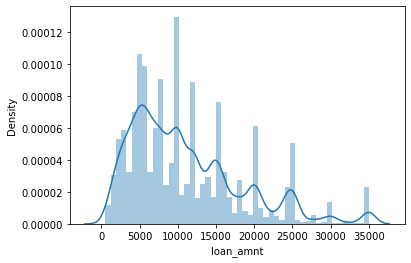

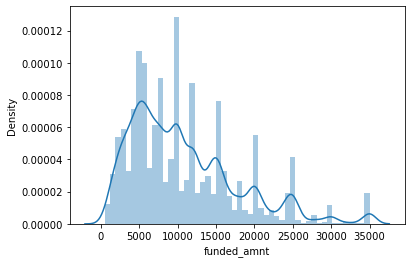

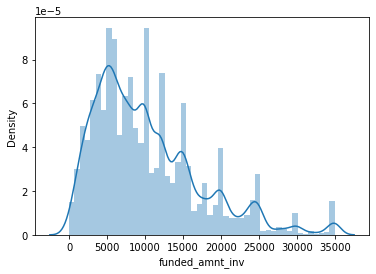

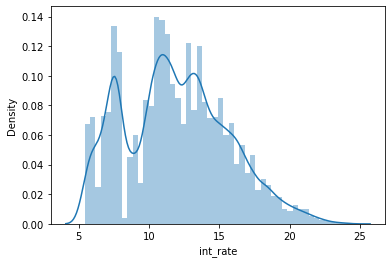

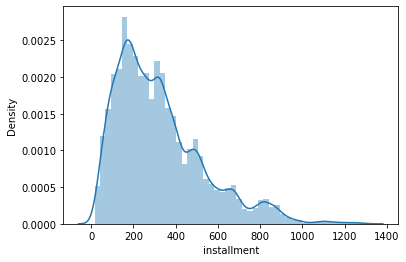

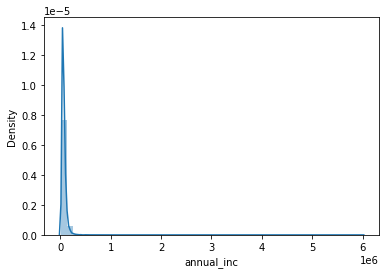

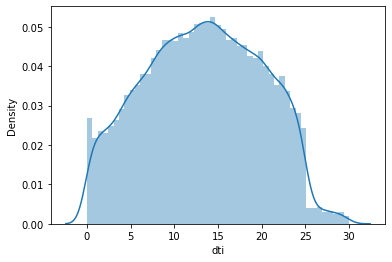

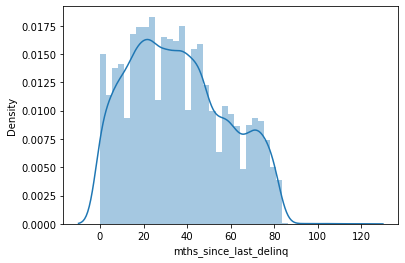

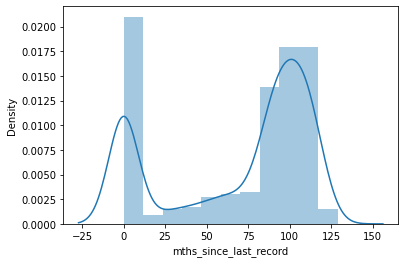

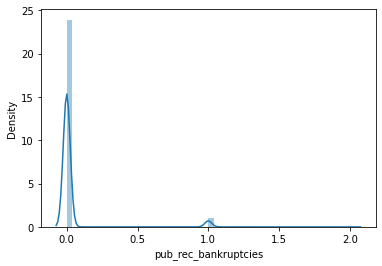

In [43]:
distplot_data_columns = loan_filtered_df.select_dtypes(include=["int64", "float64"]).columns
for col in distplot_data_columns:
    plt.figure()
    sns.distplot(loan_filtered_df[col])

**Interpretation:** 
-  Variables such as loan_amnt, funded_amnt, funded_amnt_inv, int_rate, intallment, annual_inc, mths_since_last_delinq and pub_rec_bankruptcies shows right skewed data which means mean is greater than the median for such variables and outliers exist for such cases.
-  dti (det_to_income) has normal distribution
-  Considering numerical variables such as loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti for further analysis

**Segmented Univariate Analysis**

In [91]:
num_cols_new = ["loan_amnt", "int_rate", "dti", "annual_inc"]

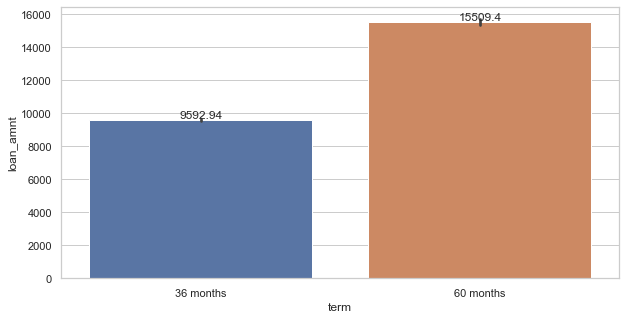

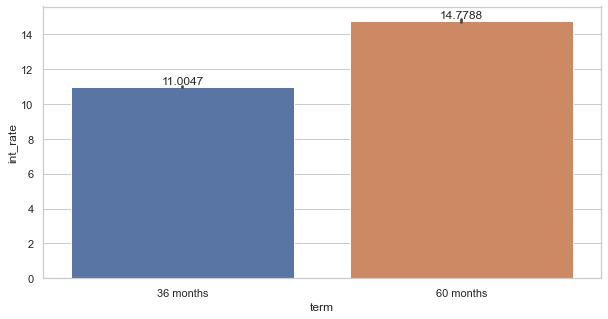

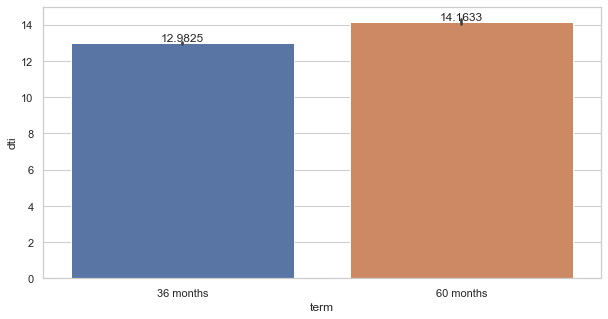

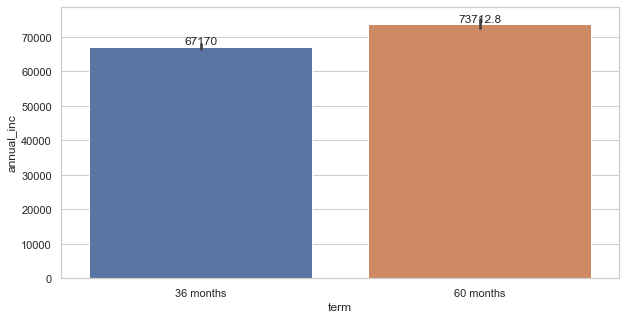

In [45]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="term", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:**
-  More loan is given out to people who opted for larger loan term period
-  More interest rate is charged to people who opted for larger loan term period
-  Debt to income of people who opteed for 60 months loan term is comparitively more, indicating if loan was given to people more for lower term duration then likelihood to repay the loan would be more
-  Difference between annual income of 36 months term customers and 60months term customers is 9%

**People who opted for 60 months term duration got their loans approved more.
One reason: More interest rate can be charged to customer leading to monitory gain to the company.
Another could be expectation is since term duration is more people would repay the loan amount and leading to less defaulter cases**

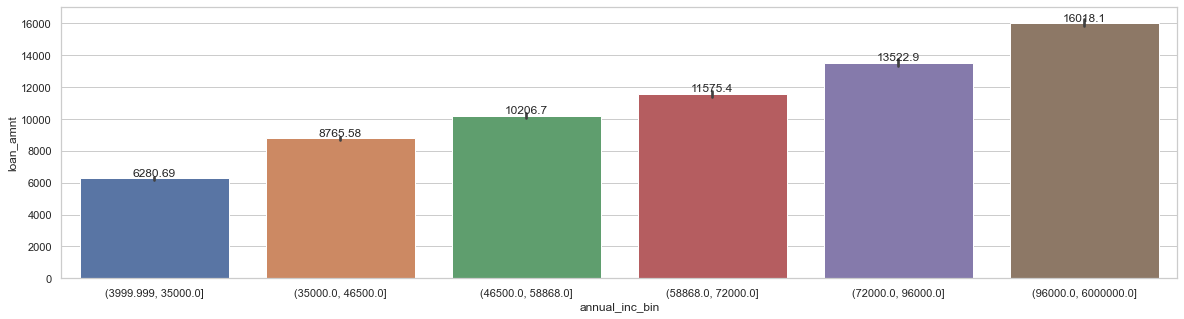

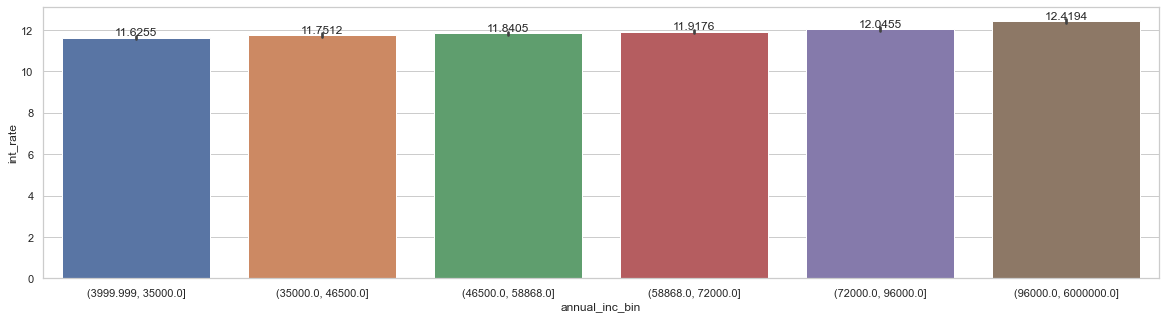

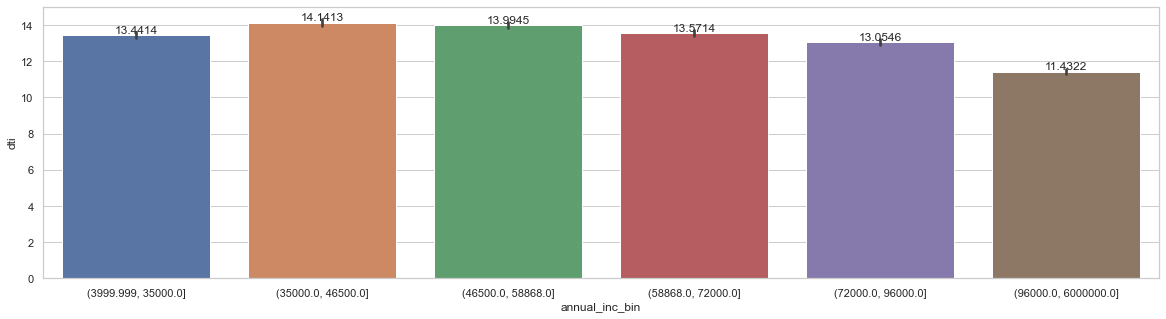

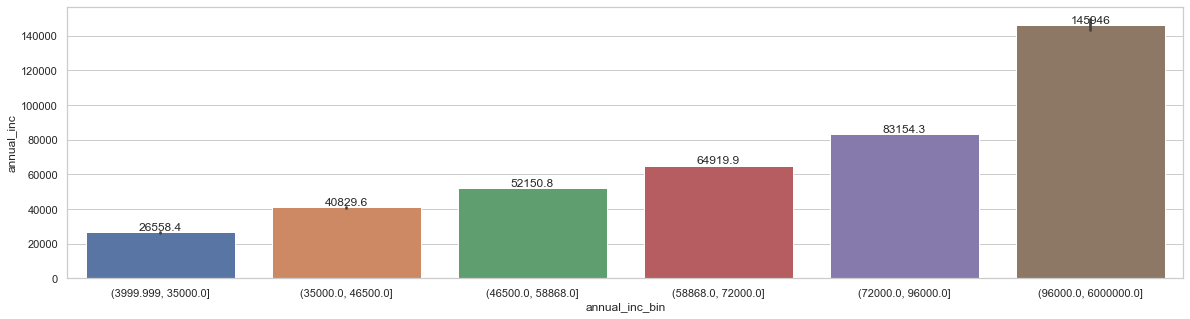

In [93]:
num_cols_new_bin = ["loan_amnt", "int_rate", "dti"]
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="annual_inc_bin", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**More loans were approved of people who had high income**

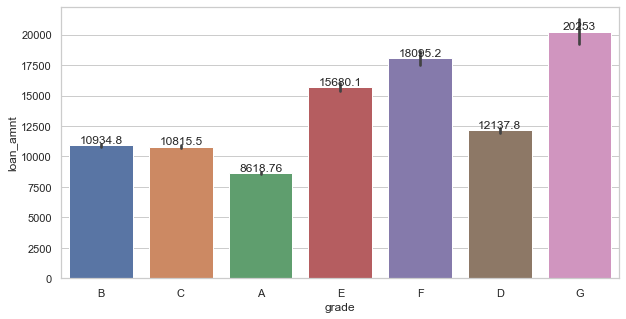

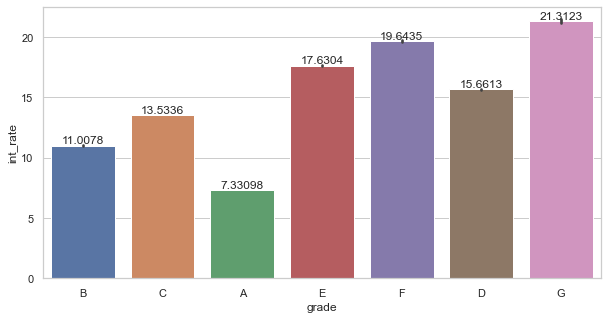

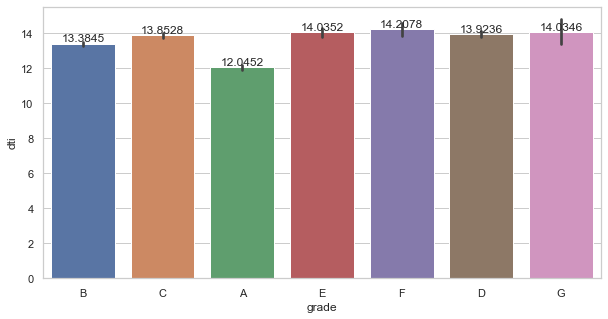

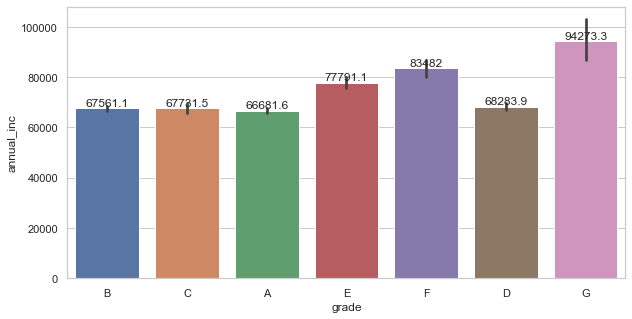

In [46]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="grade", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 

**Chart 1: **

- Chart of loan_amnt vs grade shows more loan amount is given to people whose grades are D,E,F,G i.e. where likelihood to repay loan is less
- More loan is given out to people who are likely to default


**Chart 2: **

- Chart of int_rate vs grade shows more interest rate charged to people whose grades are D,E,F,G i.e. where likelihood to repay loan is less and eventually paying high interest rate would be less too
- More interest rate is charged to people who are likely to default or wont be able to repay

**Chart 3: **

- Chart of dti vs grade shows more dti value for people whose grades are D,E,F,G i.e. where likelihood to repay loan is less and eventually high debt to income will make it more difficult to repay
-  High dti value shows people who has lower grade have a lot of debt still to pay

**Chart 4: **

- Chart of annual_inc vs grade shows annual income of people who has lower grade value is comparitively more still they failed to repay loan in past. These can be the customers who are business man

**People who are tagged to lower LC grade got their loans approved. However this should not be the case, as their likelihood to repay loan would be less and would lead to more defaulters.**


**Grades of customers are not considered while approving their loan**


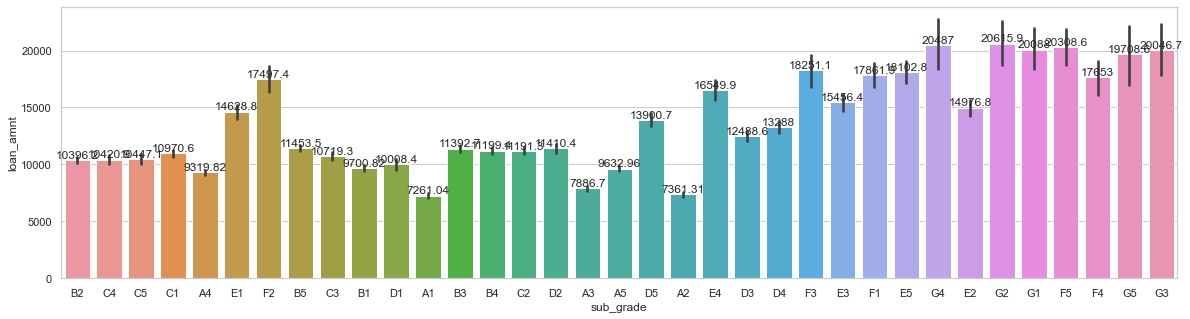

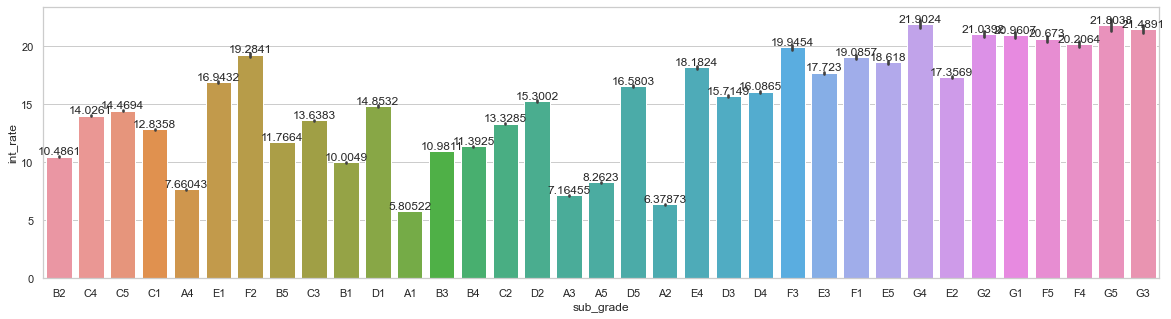

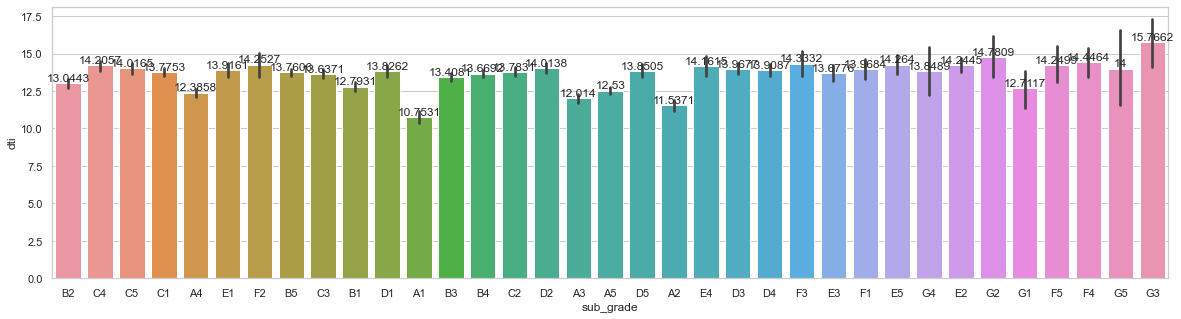

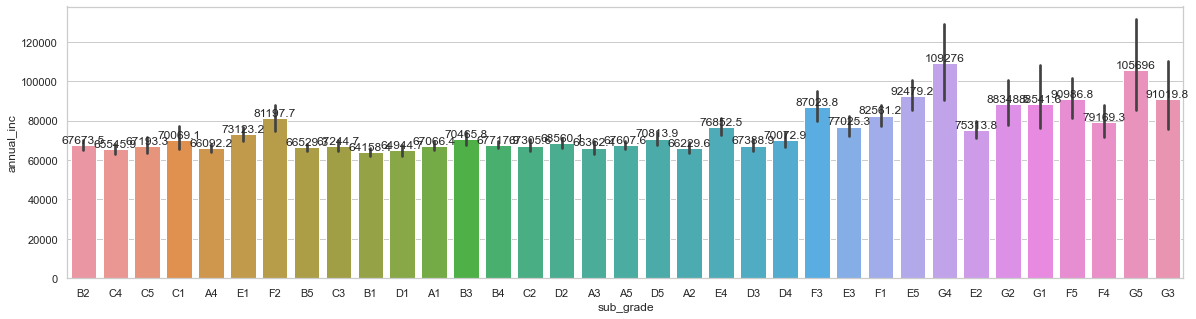

In [47]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="sub_grade", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 

**Chart 1: **

- Chart of loan_amnt vs sub_grade shows more loan amount is approved for people whose grades are D,E,F,G and sub_grades such as G4,G3,G5,G2,G1,F5 i.e. where likelihood to repay loan is less
- More loan is given out to people who are likely to default


**Chart 2: **

- Chart of int_rate vs grade shows more interest rate charged to people whose grades are D,E,F,G and sub_grades such asG4,G3,G5,G2,G1,F5 i.e. where likelihood to repay loan is less and eventually paying high interest rate would make them more prone to not repay the loan amount
- More interest rate is charged to people who are likely to default or wont be able to repay

**Chart 3: **

- Chart of dti vs grade shows more dti value for people whose grades are D,E,F,G i.e. and sub_grades such asG4,G3,G5,G2,G1,F5 where likelihood to repay loan is less and eventually high debt to income will make it more difficult to repay
-  High dti value shows people who has lower grade have a lot of debt still to pay

**Chart 4: **

- Chart of annual_inc vs grade shows customers who has higher income are those who are less likely to repay i.e. one that has lower sub-grade values.This meanspeopl with more income and low sub-grade are less likely to repay


**Sub-Grades of customers are not considered while approving their loan**


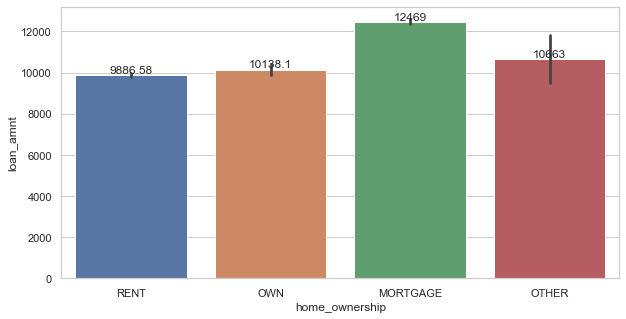

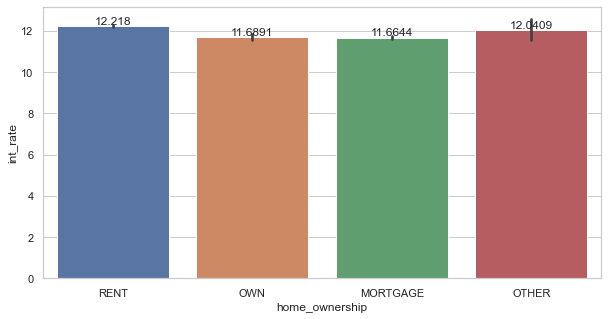

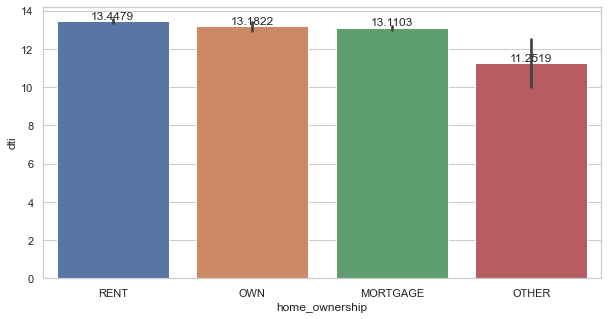

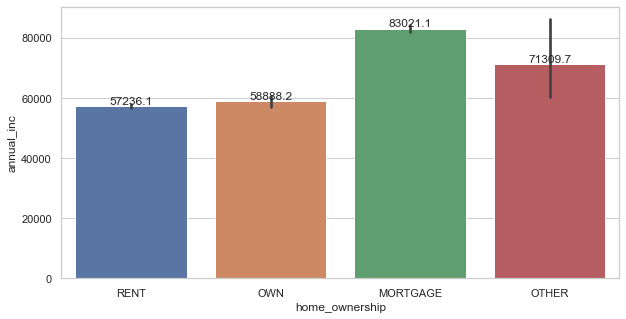

In [48]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="home_ownership", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** Loans are approved for customers who were on mortgage followed by no home ownership status known.
Leading to more defaulter cases

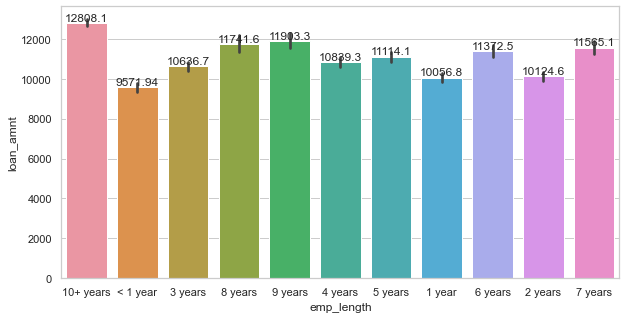

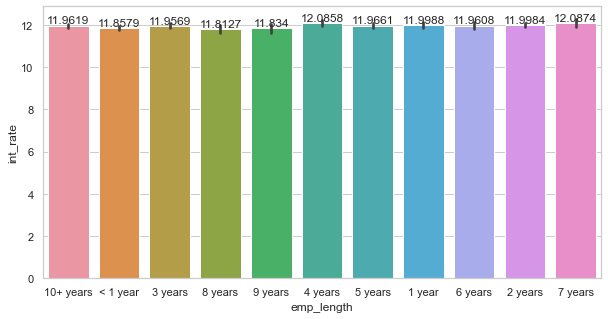

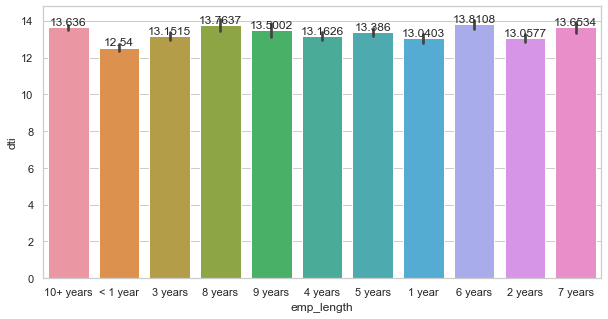

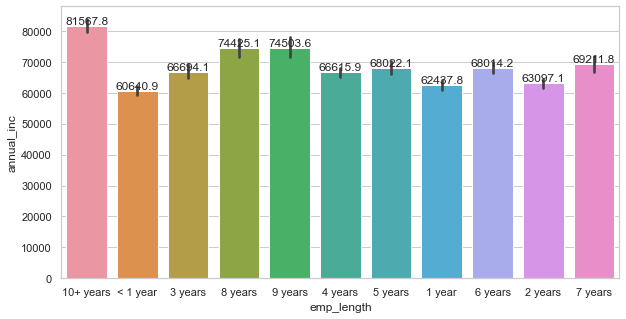

In [49]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="emp_length", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 

**Chart 1: **

- Chart of loan_amnt vs emp_length shows more loan amount is given to people who has more employment tenure. Considering they will repay the loan amount.


**Chart 2: **

- Across employment tenure people almost same interest rate is being charged. Howerver, the ones that has more employment tenure would have more income as well. So, they can be charged with high interest rates for company's own financial gain.

**Chart 3: **

-  People with more employment tenure already have high debt to income ratio which means theeir existing income is unable to address their debts. Its quite possible they end up being defaulters.

**Chart 4: **

-  Annual income of people who has higher employment tenure is more denoting either they are spending more on luxirious things to keep up to their luxurious living standards and ending up taking more loans to repay the last one, eventually contributing to more debts.

**People who have more employment length are less likely to repay loan as their current salary is less than their existing debts or to repay their existing debts they go for other loan and dont consider repaying from their savings and end up being defaulters**

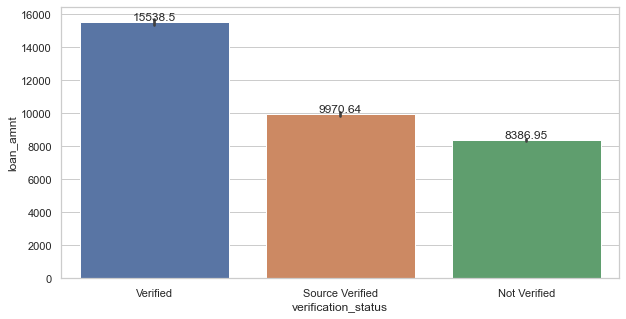

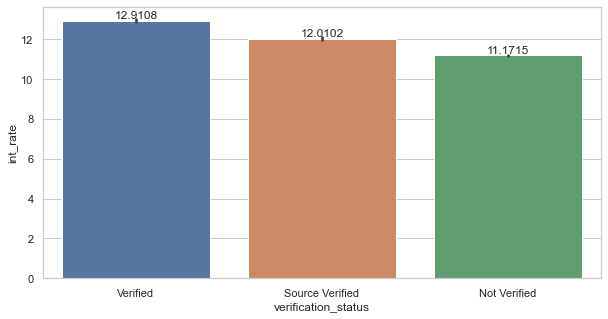

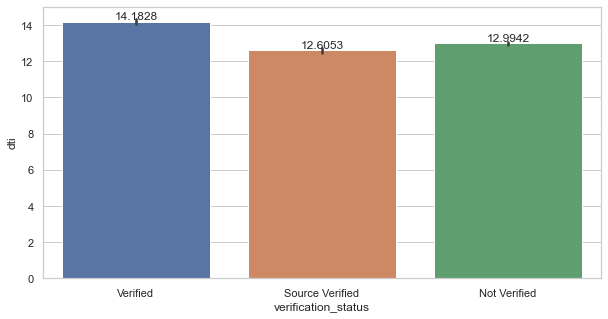

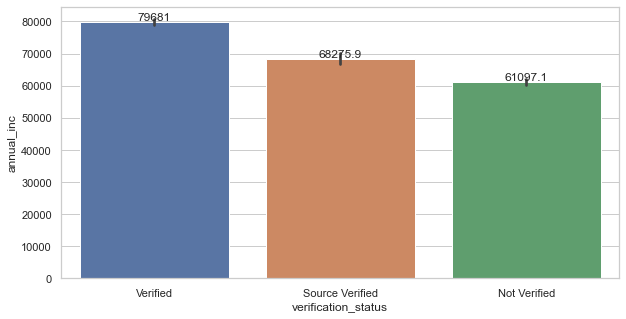

In [50]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="verification_status", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 
1. Most of the customers source of income is verified and loans are given out to such cutomers only and these are the ones that has high debt to income ratio as well.
2. Verified customers are less likely to repay as their debt to income ratio is high
3. Annual income of verified customers is highest which means they should eb able to repay the loan

**Most of the approved loan customers income was “Verified” but not source verified.**
-  **Two cases can occur:**
    -  **Document based verification done: where chances of submitting forge documents can occur.**
    -  **Verification was not at all done by the company associates owing to laziness.**

**This can lead to more defaulter cases**

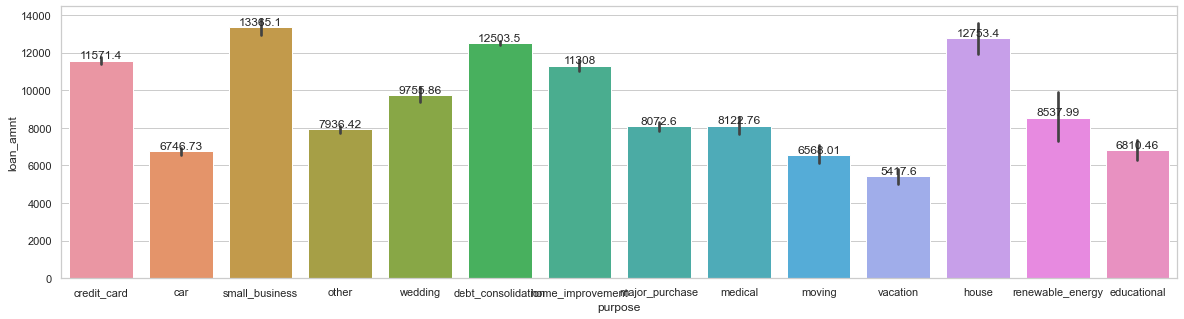

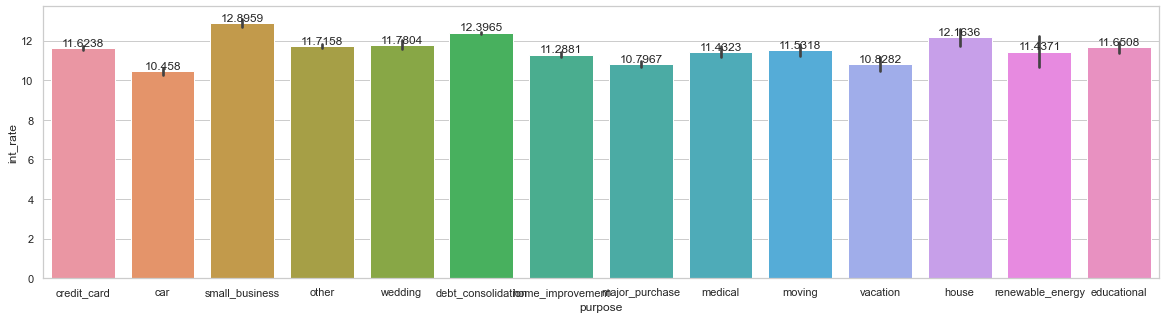

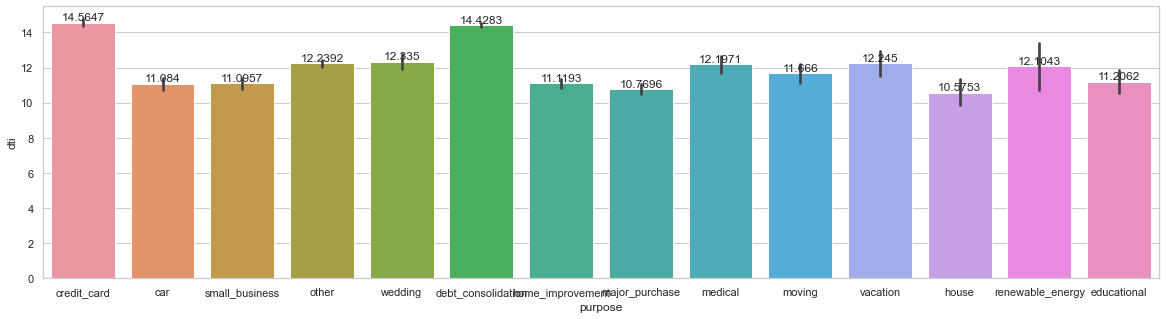

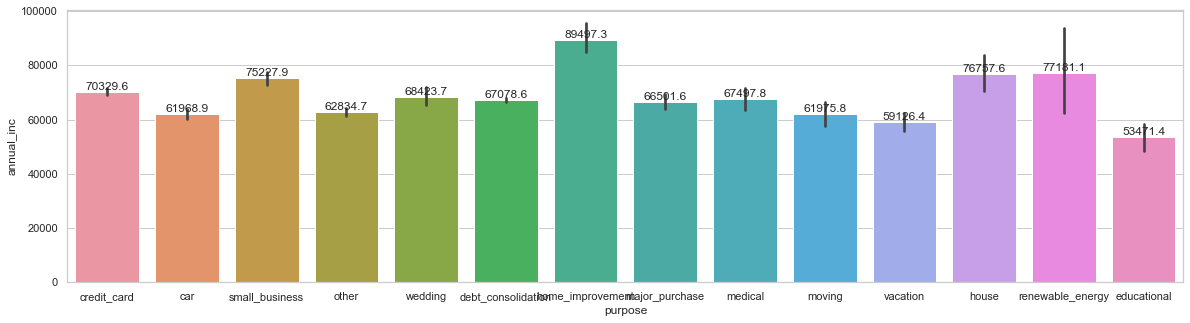

In [51]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="purpose", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:**

**Chart 1: **

-  Most of the customers took loan for their small business, purchasing home, to repay their consolidated debts, existing home renovations, weddings and purchasing luxurious comodities.

**Chart 2: **

-  Higher interest rates are being charged for small business loans, house, debt consolidation, wedding and education

**Chart 3: **

-  Likelihood to repay loan for customers who took loan for creadit card, debt consolidation, vacation is less as their debt to income ratio is high

**Chart 4: **

-  Annual income of people who got loan for home improvement, house, renewable energy, small business is quite high

loan date

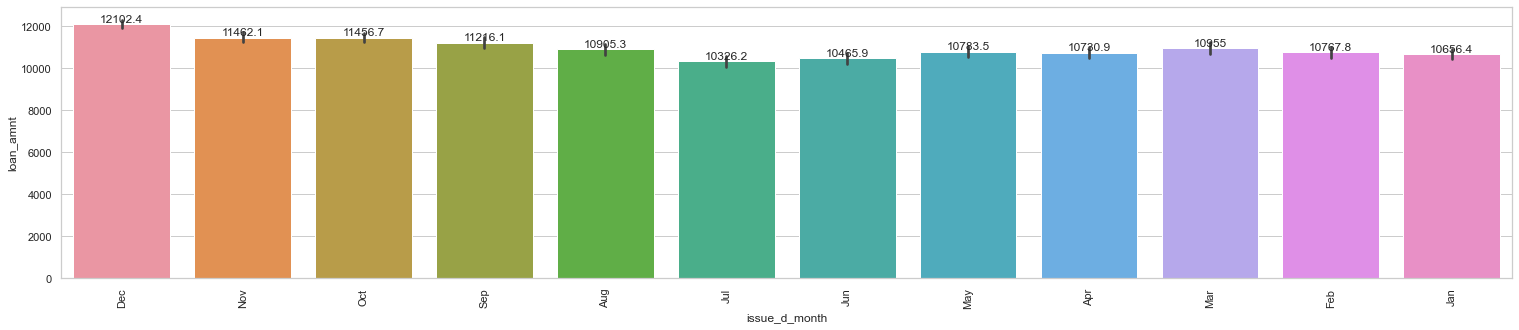

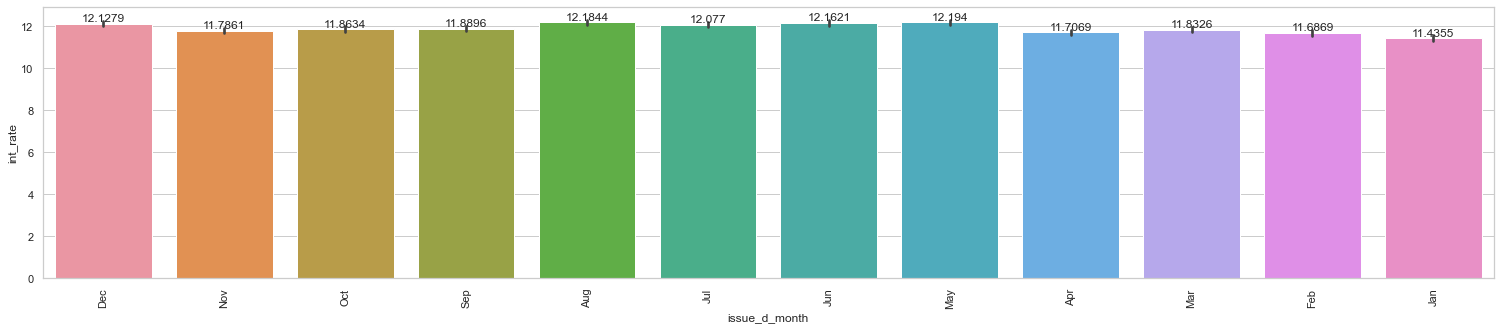

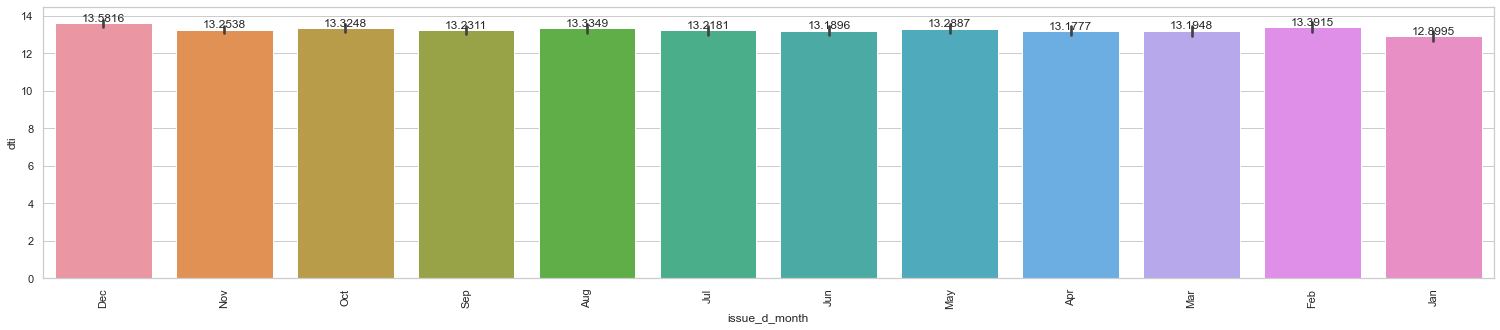

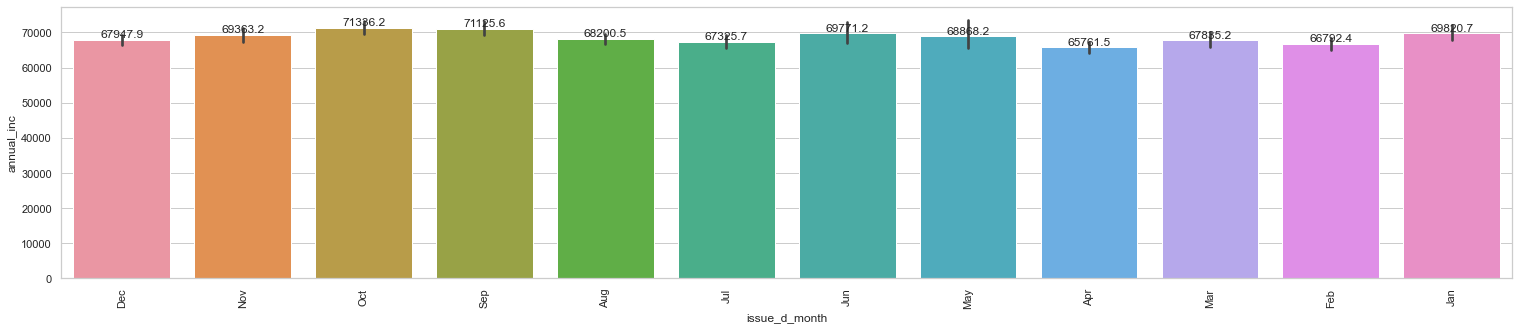

In [52]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(26, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="issue_d_month", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.show()


**Interpretation:**
-  More loans are given towards year end months
-  Interest rate does not vary across the year
-  Debt to income and annual income does not vary across year

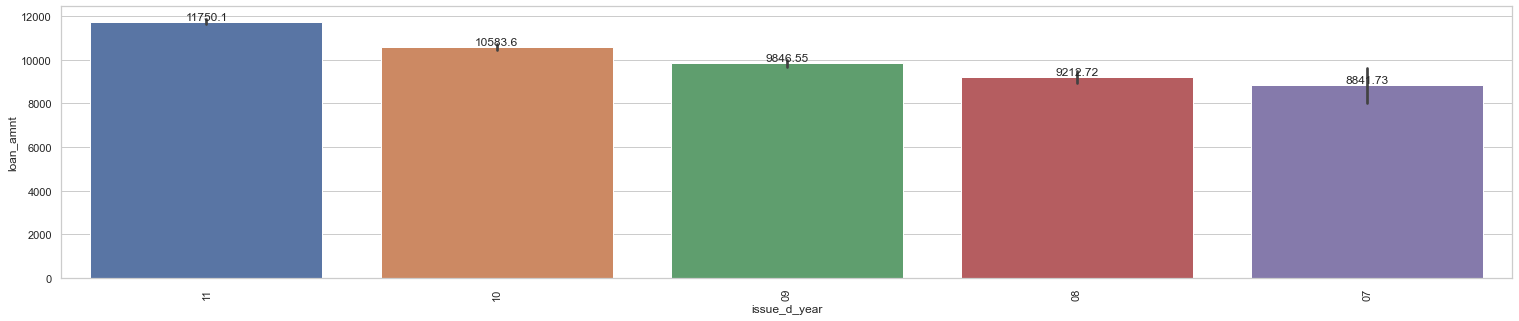

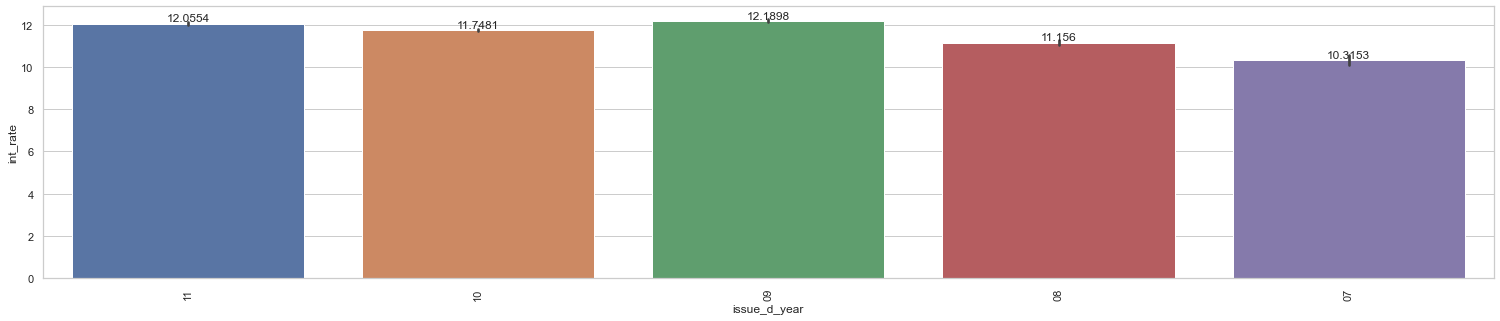

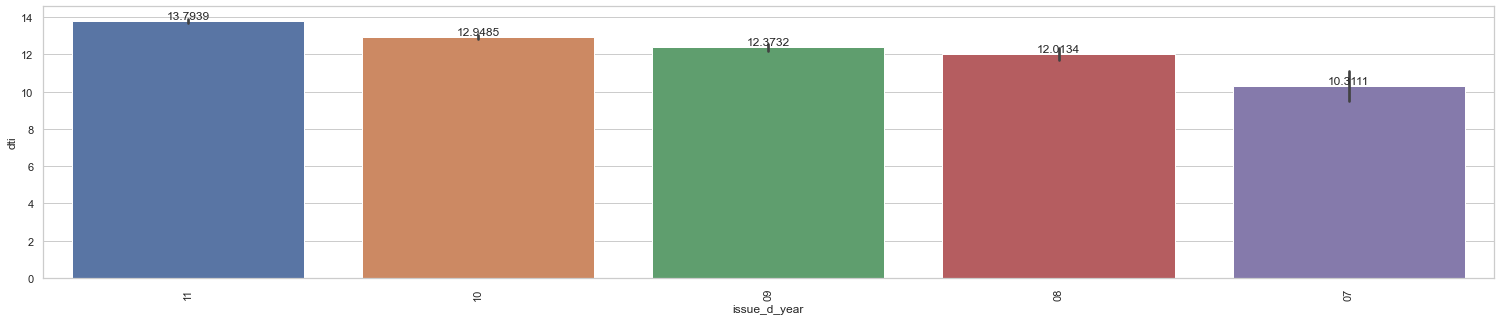

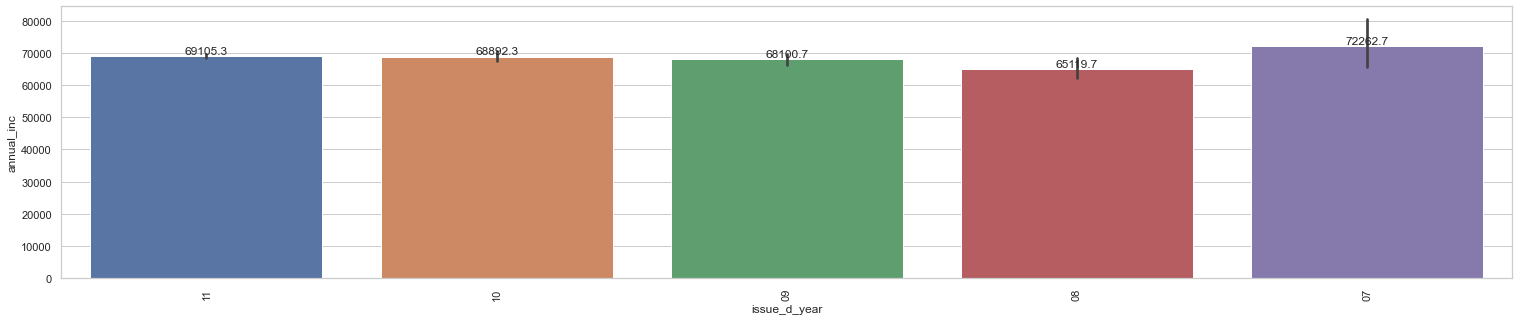

In [53]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(26, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="issue_d_year", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.show()


**Interpretation:**

-  With every year more loans are given out to people
-  2009 has highest interest rate
-  Debt to income ratio increases with every year
-  In 2007, customers had highest annual income

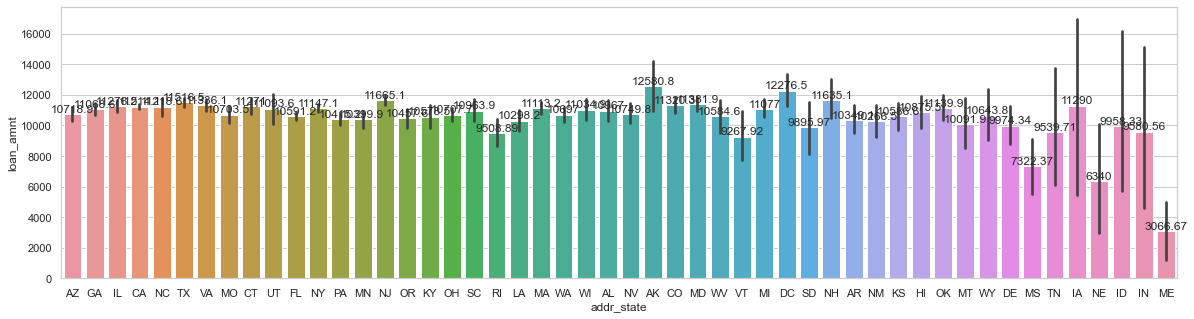

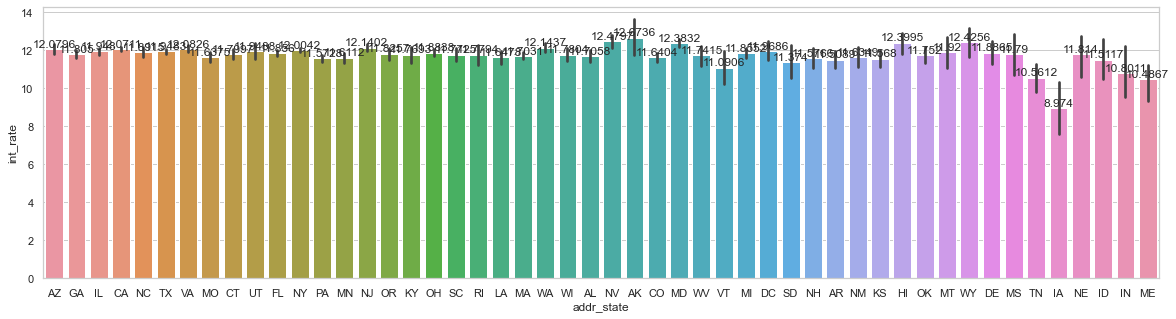

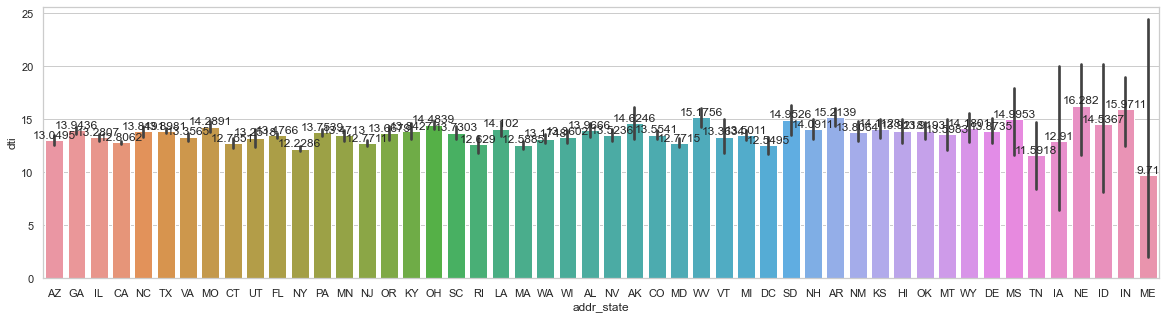

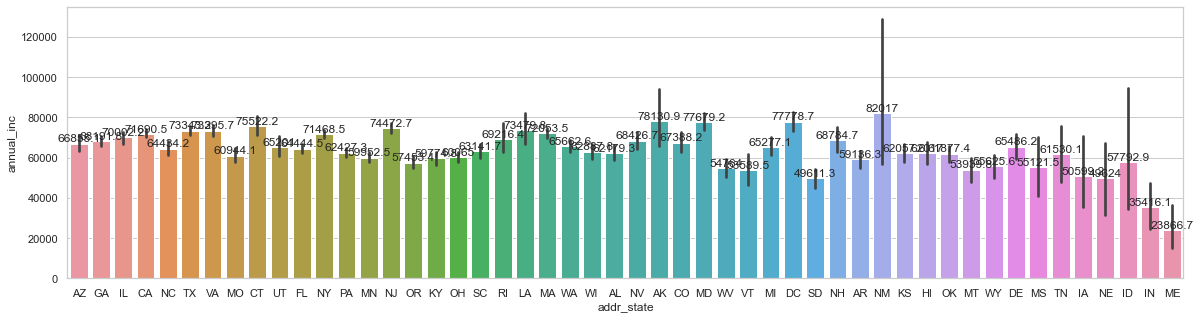

In [54]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="addr_state", y=xi, data=loan_filtered_df, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:**

**Bivariate Analysis**

Data Processing

In [55]:
# create new column to contain dummy value for grade column
loan_filtered_df["grade_num"] = loan_filtered_df["grade"]
# map string type values to integer
loan_filtered_df['grade_num'].replace(['A', 'B', "C", "D", "E", "F","G"],
                        [1, 2, 3, 4, 5, 6, 7], inplace=True)
# convert column to integer type
loan_filtered_df["grade_num"] = loan_filtered_df["grade_num"].astype(int)

In [56]:
# create new column to contain dummy value for term column
loan_filtered_df["term_num"] = loan_filtered_df["term"]
# map string type values to integer
loan_filtered_df['term_num'].replace(['36 months', '60 months'],
                        [1, 2], inplace=True)
# convert column to integer type
loan_filtered_df["term_num"] = loan_filtered_df["term_num"].astype(int)

In [57]:
# create new column to contain dummy value for term column
loan_filtered_df["issue_d_month_num"] = loan_filtered_df["issue_d_month"]
# map string type values to integer
loan_filtered_df['issue_d_month_num'].replace(['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                        [1, 2,3,4,5,6,7,8,9,10,11,12], inplace=True)
# convert column to integer type
loan_filtered_df["issue_d_month_num"] = loan_filtered_df["issue_d_month_num"].astype(int)

In [58]:
# create new column to contain dummy value for term column
loan_filtered_df["issue_d_year_num"] = loan_filtered_df["issue_d_year"]
# map string type values to integer
loan_filtered_df['issue_d_year_num'].replace(['07', '08', '09', "10", "11"],
                        [1, 2,3,4,5], inplace=True)
# convert column to integer type
loan_filtered_df["issue_d_year_num"] = loan_filtered_df["issue_d_year_num"].astype(int)

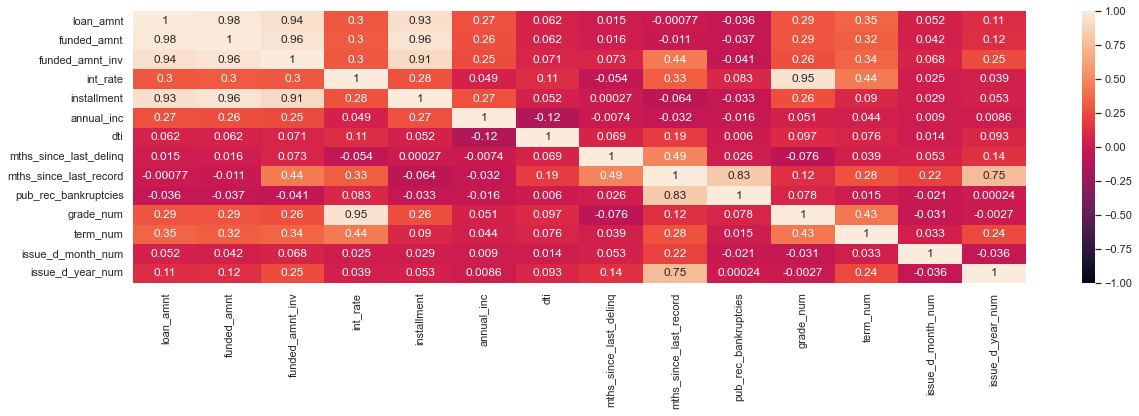

In [59]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(loan_filtered_df.corr(), vmin=-1, vmax=1, annot=True, ax=ax);

**Interpretation:**

**Variables that has strong/good correlation **
1. Loan_amnt and int_rate: Represents strong correlation of 30%.
2. Annual_income and loan_amount: Represents strong correlation of 27%.
3. All loan amount columns such as loan_amnt, funded_amnt and funded_amnt_inv have strong correlation so any of them can be used for loan_amount. Also, installment has strong correlation with loan amount columns
4. Loan_amount and grade: Represents strong correlation of 29%
5. Loan term has strong correlation with loan amount of 35% and strong correlation withint_rate of 44%
6. Loan year and term has high correlation of 24%
7. Loan year and funded amount has high correlation of 25%




**Multivariate Analysis**

In [95]:
num_cols_new = ["loan_amnt"]

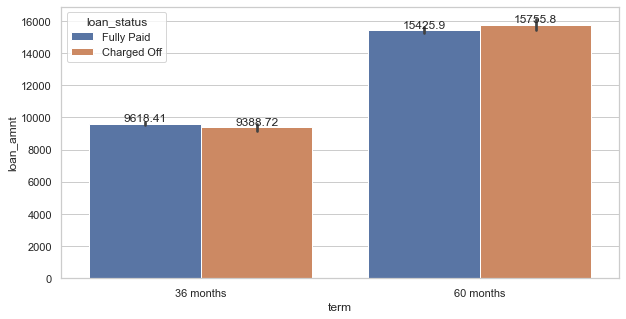

In [73]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="term", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:**
-  More defaulters are observed than fully paid customers for 60 months loan term duration
-  More interest rate is charged to people who opted for larger loan term period and more defaulters
-  Debt to income of people who opteed for 60 months loan term is comparitively more, indicating if loan was given to people more for lower term duration then likelihood to repay the loan would be more and defaulters are more too.
-  Annual income is more for customers who opted for larger term and more defaulters comparitively than 36 months term customers

**Recommendation:**
-  Shorter loan term has less defaulters than fully paid customers. Short term loans should be given to customers

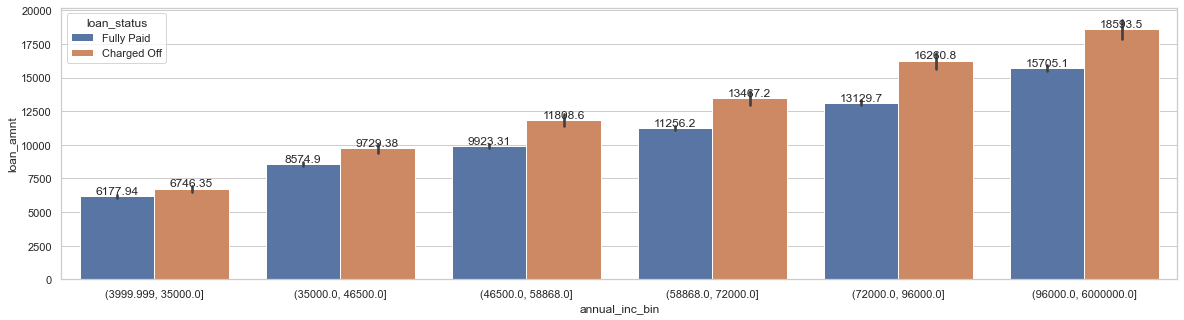

In [96]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="annual_inc_bin", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


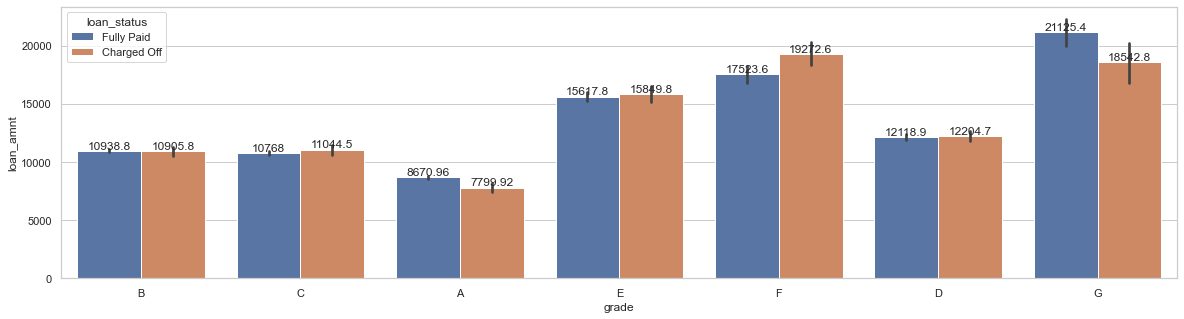

In [74]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="grade", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 


- Customers that has grade C,D,E, F has more defaulters case than fully paid customers.
- No of defaulter customers are less than full paid for grade G where more loan is given out to customers
- For all grade customers interest rate is more for defaulter customers as compared to fully paid customers
- B, C, E,F grades have high debt to income ratio which means they are less likely to repay
- For customers that have grade A has higher debt to income ratio which means likelihood to repay loan is less which should not be the case as per definition of grade A. [Definition of grade A: customers are more likely to repay as they have better grade. hence their debt to income ratio value should be less and less defaulter customers should be there]
- For grades E,F and G customers that are defaulters is highest however less than fully paid customers.
- Grades and annual income doesnot have strong relation

**Recommendation:**
-  Customers who have better grades should be considered while approving loans


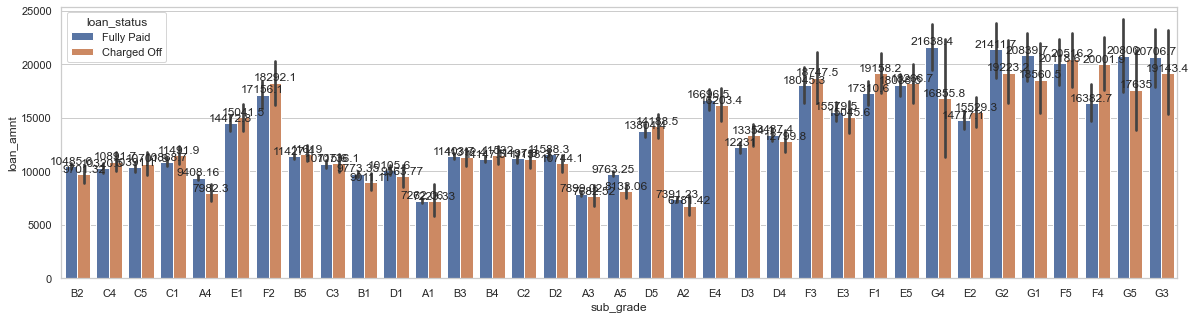

In [75]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="sub_grade", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 

**Chart 1: **

- F2,E1,C1,C5,C4,B5,B4,D5,D3,F3,F1,F5,E5,F4 sub-grades has higher defaulter customers than fully paid customers
- For all sub_grades customers deafulter cases are more than fully paid customers
- C4, C5, C1, A4,B5,C3,A1,B4,C2,A3,A5,A2,E4,D3,D4,F1,E3,E2,G2,F4 sub-grade customers has more defaulter customers than fully paid customers



**Recommendation:**
-  Customers with better sub-grades should eb considered while approving loans.


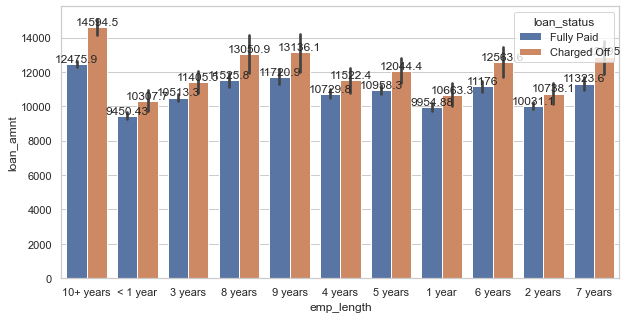

In [76]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="emp_length", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 

**Chart 1: **

- Chart of loan_amnt vs emp_length shows more loan amount is given to people who has more employment tenure and more defaulters exist where employment length if more


**Chart 2: **

- Across employment tenure people almost same interest rate is being charged. Howerver, the ones that has more employment tenure would have more income as well. So, they can be charged with high interest rates for company's own financial gain.
- Defaulters have much higher interest rate as compared to fully paid customers

**Chart 3: **

-  People with more employment tenure already have high debt to income ratio which means theeir existing income is unable to address their debts. Its quite possible they end up being defaulters.

**Chart 4: **

-  Even after having more income, customers that has higher employment length are more defaulters

**Recommendation:**
-  Employment length not a determining factor for approving loans as defaulters are more than fully paid customers across emp_length group

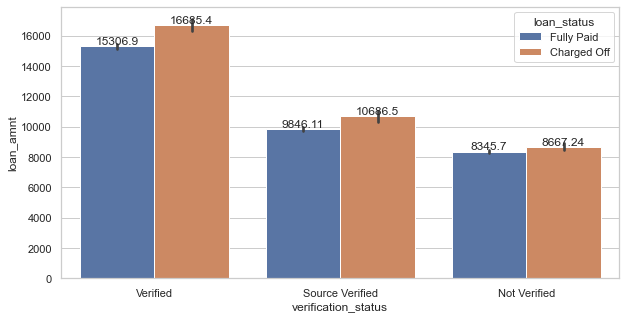

In [77]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="verification_status", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:** 
1. Most of the customers source of income is verified and loans are given out to such cutomers and more defaulters as well.
Verification status doesnot derive loan giving tendency.
2. Verified customers are less likely to repay as their debt to income ratio is high and more defaulters as well.
3. Annual income of verified customers is highest which means they should be able to repay the loan but highest defaulters are also observed for verified customers

**Recommendation:**
-  Verification status not a determining factor for approving loans as defaulters are more than fully paid customers across verification_status group

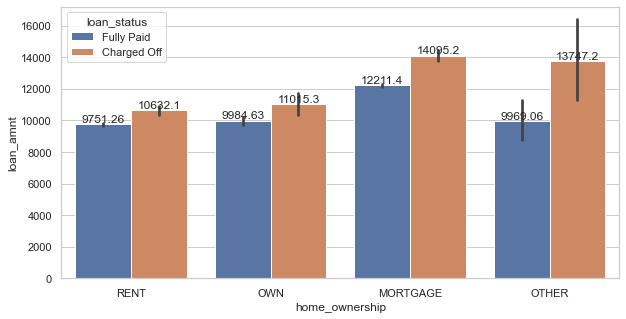

In [79]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="home_ownership", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Recommendation:**
Customers who have rented apartment or own house likely to repay loan as compared to mortgage and others

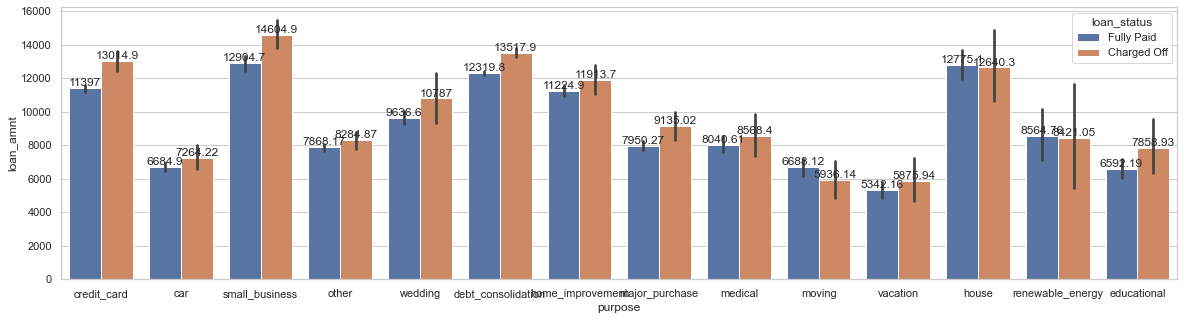

In [78]:
for xi in num_cols_new:
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(20, 5))

    # Draw a nested barplot by species and sex
    # drawing the plot
    sns.barplot(x="purpose", y=xi, data=loan_filtered_df, ax=ax, hue="loan_status")
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


**Interpretation:**

-  Most of the customers took loan for their small business, purchasing home, to repay their consolidated debts, existing home renovations, weddings and purchasing luxurious comodities.
-  More defaulters exist for customers who took loan for small_business, debt consolidation, credit_card and wedding
-  More interest rate is charged to customers who took loan for hpuse, small business and credit card
-  High debt to ratio exist for customers who took loan for credit card, vacation, renewable energy and are defaulters

**Recommendation:**
-  Purpose of loan not a determining factor for approving loans as defaulters are more than fully paid customers across purpose 
